## Function Transformer

The FunctionTransformer from sklearn allows you to apply a custom function to your data. This can be useful for data preprocessing or feature extraction. Below is an example of how to use FunctionTransformer:

```python
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define a custom function
def log_transform(x):
    return np.log1p(x)

# Create the transformer
log_transformer = FunctionTransformer(log_transform)

# Example data
data = np.array([[1, 2], [3, 4]])

# Transform the data
transformed_data = log_transformer.transform(data)
print(transformed_data)
```


In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv("loan.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [196]:
data = df.copy()

In [197]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\shark\AppData\Local\Temp\ipykernel_10016\3994259266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"]) #deprecate function distplot


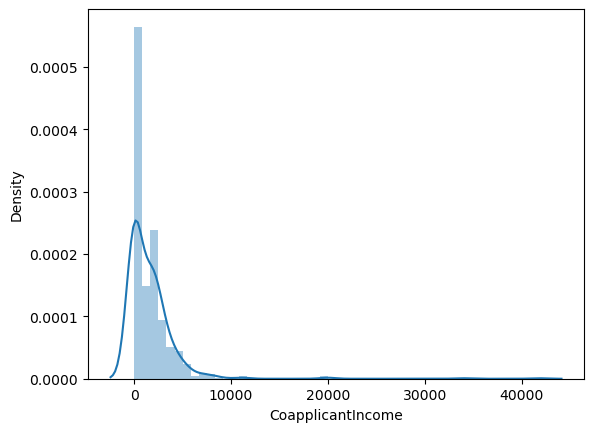

In [198]:
sns.distplot(df["CoapplicantIncome"]) #deprecate function distplot
plt.show()

## Remove outlire using iqr method

In [199]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)

iqr = q3 - q1

In [200]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
lower_bound,upper_bound

(-3445.875, 5743.125)

In [201]:

#for uuper & lower value
df_no_outlier = df[df['CoapplicantIncome']<=upper_bound]

C:\Users\shark\AppData\Local\Temp\ipykernel_10016\3745822888.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"]) #deprecate function distplot
C:\Users\shark\AppData\Local\Temp\ipykernel_10016\3745822888.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outlier["C

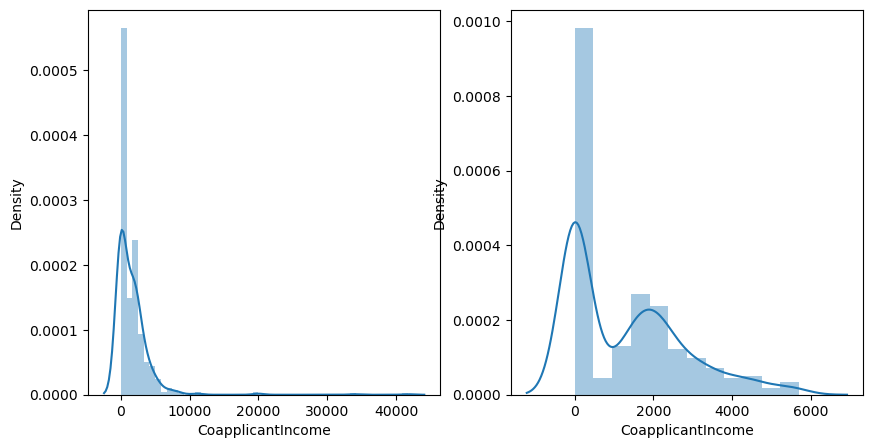

In [202]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["CoapplicantIncome"]) #deprecate function distplot

plt.subplot(1,2,2)
sns.distplot(df_no_outlier["CoapplicantIncome"]) #deprecate function distplot
plt.show()

In [203]:
#import
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [204]:
ft = FunctionTransformer(func=np.log1p)
ft1 = FunctionTransformer(func=np.log1p)

`**why use log1p?**`</br>
The function `log1p` is used to compute the natural logarithm of \(1 + x\). It is particularly useful for small values of \(x\) where directly computing `log(1 + x)` might result in a loss of precision due to the limitations of floating-point arithmetic.

Here's a simple example in Python:

```python
import math

# Using log1p for better precision with small x
x = 1e-10
result = math.log1p(x)
print(result)  # Output: 1e-10

# Directly using log(1 + x) might lose precision
result_direct = math.log(1 + x)
print(result_direct)  # Output: 1e-10
```

In this example, both methods give the same result, but `log1p` is more reliable for very small values of \(x\).

In [205]:
ft.fit(df_no_outlier[["CoapplicantIncome"]])

#withoutoutlier
ft1.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [206]:
df_no_outlier["CoapplicantIncome_tf"] = ft.transform(df_no_outlier[["CoapplicantIncome"]])
#withoutoutlier
df["CoapplicantIncome_tf"] = ft.transform(df[["CoapplicantIncome"]])

C:\Users\shark\AppData\Local\Temp\ipykernel_10016\2080318079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier["CoapplicantIncome_tf"] = ft.transform(df_no_outlier[["CoapplicantIncome"]])


C:\Users\shark\AppData\Local\Temp\ipykernel_10016\2645688058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outlier["CoapplicantIncome"]) #deprecate function distplot
C:\Users\shark\AppData\Local\Temp\ipykernel_10016\2645688058.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no

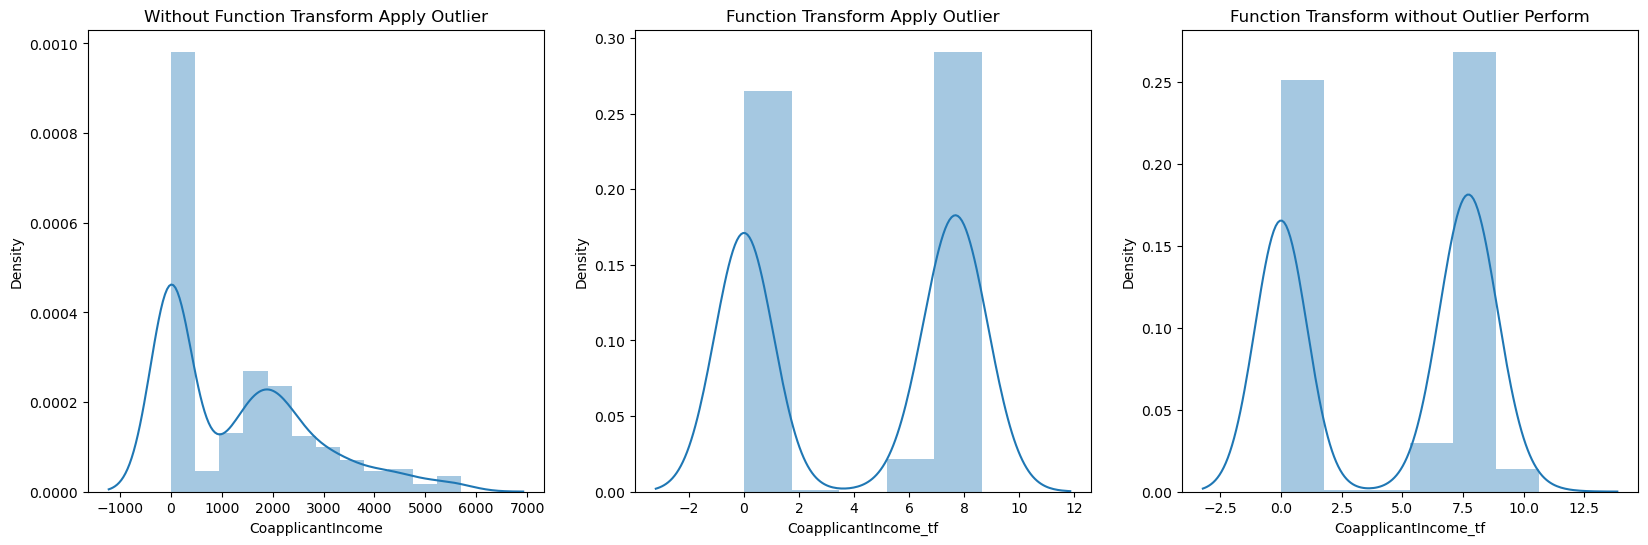

In [207]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Without Function Transform Apply Outlier")
sns.distplot(df_no_outlier["CoapplicantIncome"]) #deprecate function distplot

plt.subplot(1,3,2)
plt.title("Function Transform Apply Outlier")
sns.distplot(df_no_outlier["CoapplicantIncome_tf"]) #deprecate function distplot

plt.subplot(1,3,3)
plt.title("Function Transform without Outlier Perform")
sns.distplot(df["CoapplicantIncome_tf"]) #deprecate function distplot
plt.show()

## Function Transform with Remove Outlier

In this approach, we first remove the outliers from the dataset using the Interquartile Range (IQR) method. The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any data points outside the range \([Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]\) are considered outliers and are removed. After removing the outliers, we apply the `FunctionTransformer` to transform the `CoapplicantIncome` using the natural logarithm of \(1 + x\) (`log1p`).

## Function Transform without Remove Outlier

In this approach, we directly apply the `FunctionTransformer` to the entire dataset without removing any outliers. The `FunctionTransformer` is used to transform the `CoapplicantIncome` using the natural logarithm of \(1 + x\) (`log1p`). This transformation helps in handling skewed data and stabilizing the variance.

In [208]:
df_no_outlier.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CoapplicantIncome_tf
count,596.000000,596.00000,574.000000,582.00000,549.000000,596.000000
mean,5403.332215,1289.12906,142.871080,342.57732,0.843352,4.140441
std,6142.754002,1461.72508,81.169683,64.98370,0.363800,3.834282
min,150.000000,0.00000,9.000000,12.00000,0.000000,0.000000
25%,2894.750000,0.00000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1031.00000,126.000000,360.00000,1.000000,6.939253
75%,5754.500000,2173.00000,161.750000,360.00000,1.000000,7.684316
max,81000.000000,5701.00000,700.000000,480.00000,1.000000,8.648572


In [209]:
ft2 = FunctionTransformer(func=lambda x : x**2)
ft2.fit(df[["CoapplicantIncome"]])
df["CoapplicantIncome_tf2"] = ft2.transform(df[["CoapplicantIncome"]])

C:\Users\shark\AppData\Local\Temp\ipykernel_10016\873708825.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"]) #deprecate function distplot
C:\Users\shark\AppData\Local\Temp\ipykernel_10016\873708825.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantInc

<Axes: title={'center': 'Function Transform Apply Outlier'}, xlabel='CoapplicantIncome_tf2', ylabel='Density'>

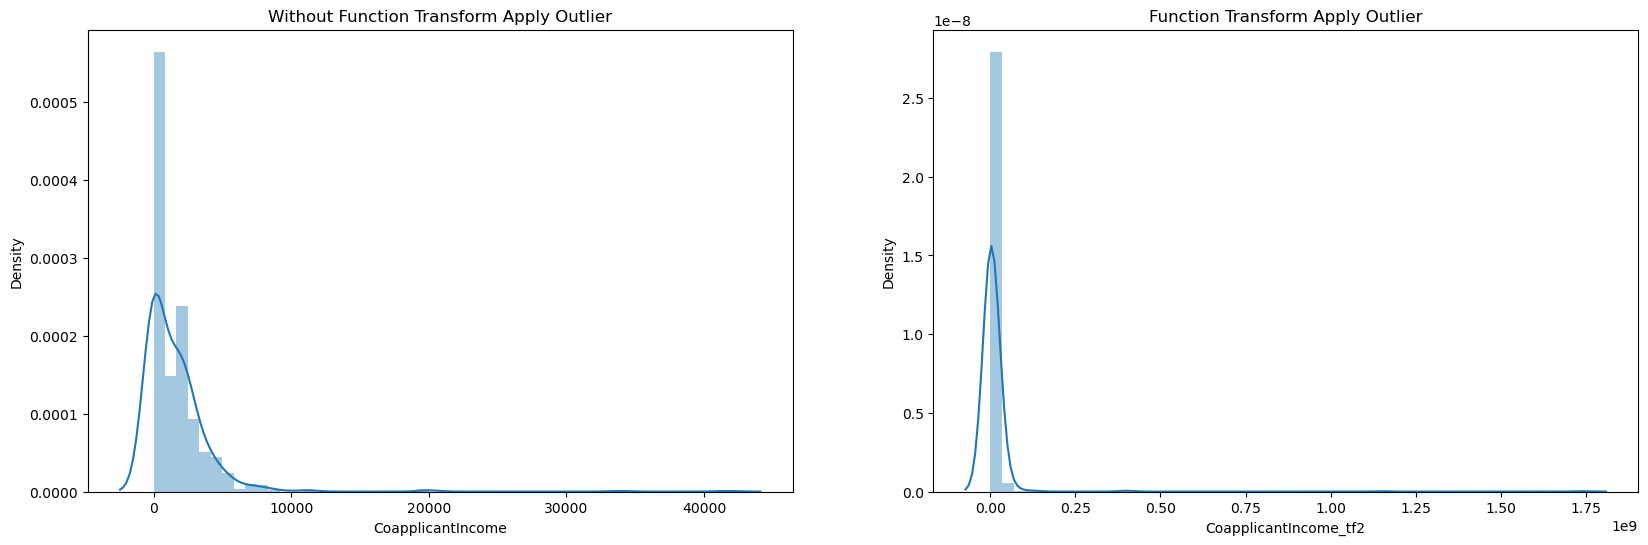

In [210]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Without Function Transform Apply Outlier")
sns.distplot(df["CoapplicantIncome"]) #deprecate function distplot

plt.subplot(1,2,2)
plt.title("Function Transform Apply Outlier")
sns.distplot(df["CoapplicantIncome_tf2"]) #deprecate function distplot


In [211]:
ft3 = FunctionTransformer(func=lambda x : x**2)
ft3.fit(df_no_outlier[["CoapplicantIncome"]])
df_no_outlier["CoapplicantIncome_tf3"] = ft3.transform(df_no_outlier[["CoapplicantIncome"]])

C:\Users\shark\AppData\Local\Temp\ipykernel_10016\651717728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier["CoapplicantIncome_tf3"] = ft3.transform(df_no_outlier[["CoapplicantIncome"]])


C:\Users\shark\AppData\Local\Temp\ipykernel_10016\473758808.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outlier["CoapplicantIncome"]) #deprecate function distplot
C:\Users\shark\AppData\Local\Temp\ipykernel_10016\473758808.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_o

<Axes: title={'center': 'Function Transform Apply Outlier'}, xlabel='CoapplicantIncome_tf3', ylabel='Density'>

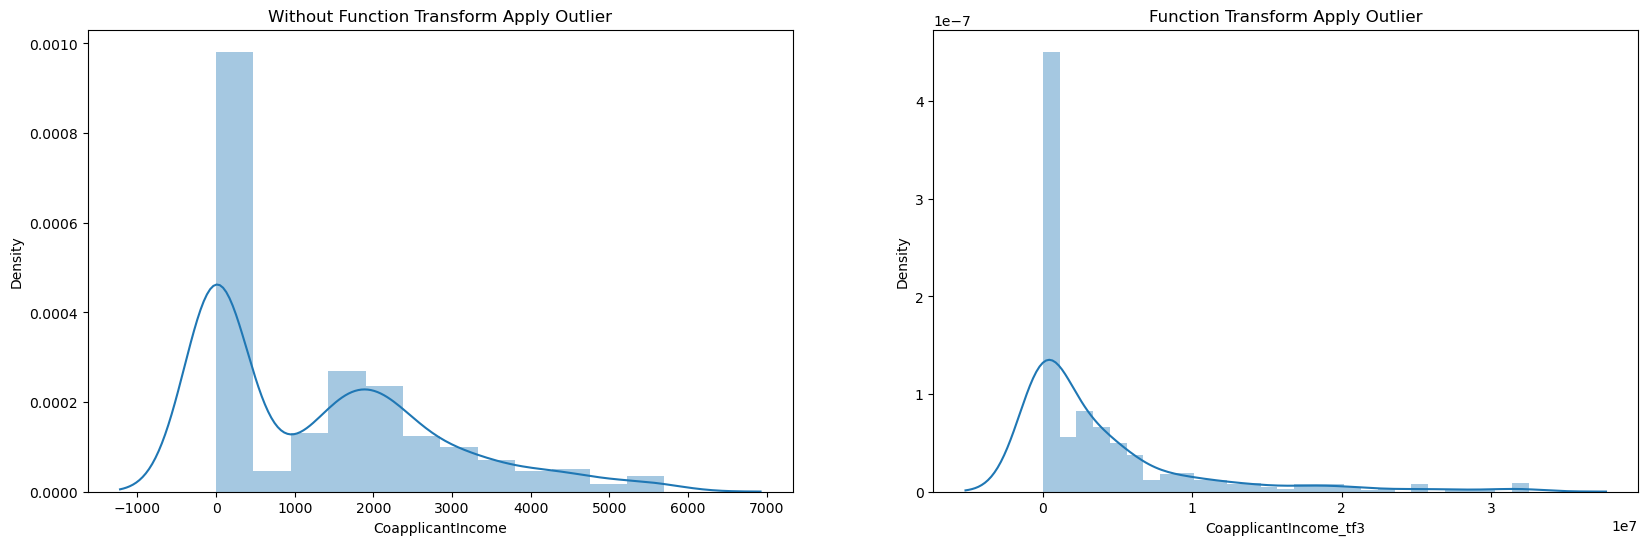

In [212]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Without Function Transform Apply Outlier")
sns.distplot(df_no_outlier["CoapplicantIncome"]) #deprecate function distplot

plt.subplot(1,2,2)
plt.title("Function Transform Apply Outlier")
sns.distplot(df_no_outlier["CoapplicantIncome_tf3"]) #deprecate function distplot
